密度モデル$(\rho : r/R_s [\rm{R_\odot}], n_e : [\rm{cm^{-3}}])$

* $1-10R_\odot \rightarrow n_e(\rho) = 10 \times 10^8  (2.99\rho^{-16} + 1.55\rho^{-6}) $ (10 $ \times $ Baumbach-Allen model [Allen, 1947])


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp

# Baumbach-Allen model
def baumbach_allen_model1(rho):
    return 10*1e8*(2.99*rho**(-16) + 1.55*rho**(-6))



# Baumbach-Allen modelを周波数に変換
def frequency(rho):
    electron = 1.60217662e-19    # 電気素量：C
    m_e = 9.10938356e-31         # 電子の質量：kg
    epsilon_0 = 8.854187817e-12  # 真空の誘電率：F/m
    
    frequency_Hz =  1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e))*1e3*np.sqrt(baumbach_allen_model1(rho))
    frequency_MHz = frequency_Hz / 1e6
    return frequency_MHz

# # 周波数の近似式
# def frequency(rho):
#     frequency_Hz = 9e3*np.sqrt(baumbach_allen_model1(rho))
#     frequency_MHz = frequency_Hz / 1e6
#     return frequency_MHz

# rho_symbol = sp.symbols('rho')
# rhoの範囲(Baumbach-Allen modelの定義域:>1.2R, 215R = 1AU)
rho_value = np.arange(1.2, 215, 0.01)

In [2]:
# electron = 1.60217662e-19
# m_e = 9.10938356e-31
# epsilon_0 = 8.854187817e-12

# print(1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e)))

## $n_e$のプロット

In [4]:
# # 電子密度の関数をプロット
# plot_function_ne(rho_value, r'10$ \times $Baumbach-Allen Model')
# plt.show()

## $f_p$のプロット

In [5]:
# 周波数とrhoの関係をプロット
def plot_function_frequency(rho, function, label):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))
    ax.set_yscale('log') # 片対数グラフ
    ax.set_xlabel(r'$\rho [R_\odot]$', fontsize=20)
    ax.set_ylabel(r"Frequency [MHz]", fontsize=20)
    ax.plot(rho, function, label=label, color='red', linewidth=0.5)
    
    # Find rho values corresponding to specific frequencies using fsolve
    rho_40MHz = fsolve(lambda rho: frequency(rho) - 40, x0=1.2)[0] # x0 is the initial guess for rho value 
    rho_15MHz = fsolve(lambda rho: frequency(rho) - 15, x0=1.2)[0]
    rho_14MHz = fsolve(lambda rho: frequency(rho) - 14, x0=1.2)[0]
    rho_300kHz = fsolve(lambda rho: frequency(rho) - 0.3, x0=1.2)[0]
    
    
    # Set the y-axis limits in MHz
    ax.set_ylim(300e3/1e6, 4e7/1e6)
    ax.set_xlim(1.2, rho_300kHz+0.5)
    ax.grid()
    ax.axhline(y=15e6/1e6, color='blue', linestyle='--', linewidth=0.8)
    ax.axhline(y=14e6/1e6, color='orange', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_40MHz, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_15MHz, color='blue', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_14MHz, color='orange', linestyle='--', linewidth=0.8)
    # ax.axvline(x=rho_300kHz, color='gray', linestyle='--', linewidth=0.8)
    

    # Plot the text on the graph
    ax.text(rho_40MHz-2.5, 40e6/1e6, r'$40\,\rm{MHz}$', fontsize=18, color='green')
    ax.text(rho_40MHz-2.5, 16e6/1e6, r'$15\,\rm{MHz}$', fontsize=18, color='blue')
    ax.text(rho_40MHz-2.5, 13e6/1e6, r'$14\,\rm{MHz}$', fontsize=18, color='orange')
    ax.text(rho_40MHz-2.5, 3e5/1e6, r'$300\,\rm{kHz}$', fontsize=18, color='red')
    ax.text(1.2, 3e5/1e6-0.5e5/1e6, r'$1.20$', fontsize=10)
    
    
    # Plot points on the graph
    ax.scatter([rho_40MHz, rho_15MHz, rho_14MHz, rho_300kHz], [40, 15,14,  0.3], color=['green', 'blue', 'orange', 'red'], marker='o')
    
    # Plot the text on the graph for rho values
    ax.text(rho_40MHz, 1.7e5/1e6, f'{rho_40MHz:.2f}', fontsize=18, color='green')
    # 矢印を描画
    ax.annotate('',
                xy=(rho_40MHz, 300e3/1e6), xycoords='data',
                xytext=(rho_40MHz+0.35, 2.1e5/1e6), textcoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'),
                )
    ax.text(rho_15MHz-0.4, 2.4e5/1e6, f'{rho_15MHz:.2f}', fontsize=18, color='blue')
    ax.text(rho_14MHz, 3.6e5/1e6, f'{rho_14MHz:.2f}', fontsize=18, color='orange')
    ax.annotate('',
            xy=(rho_14MHz, 300e3/1e6), xycoords='data',
            xytext=(rho_14MHz+0.3, 3.5e5/1e6), textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange'),
            )
    ax.text(rho_300kHz-0.4, 2.4e5/1e6, f'{rho_300kHz:.2f}', fontsize=18, color='red')
    ax.legend(loc='best', fontsize=18)

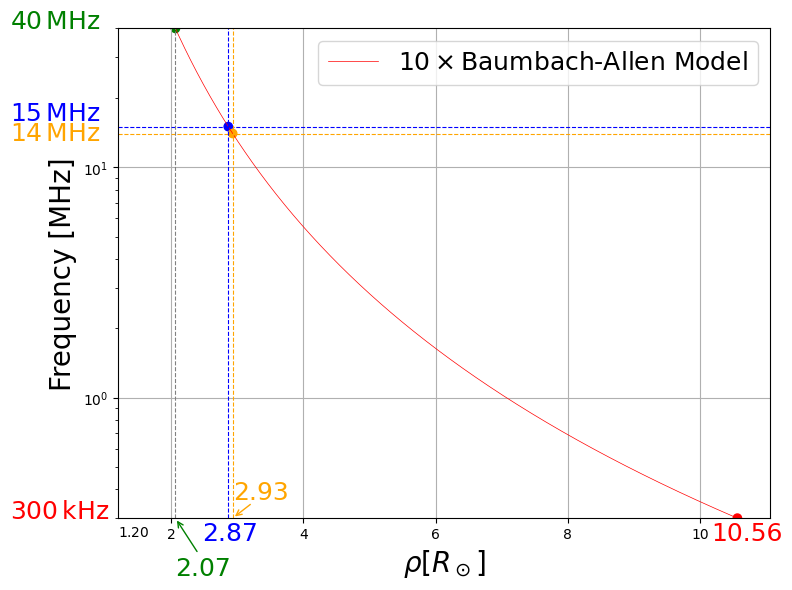

In [6]:
plot_function_frequency(rho_value, frequency(rho_value), r'$10\times$Baumbach-Allen Model')
plt.show()

## $\Delta v$の計算

読み取りmemo

2022年6月13日

- HF帯アンテナ

HF帯開始周波数：30MHz + 0.6(定規)　(＠03:24:20)

HF帯終了周波数：20MHz + 0.75(定規)　(＠03:33:00)

$\Delta t = $ 8min 40s = 520s

- Wind

Wind開始周波数：14MHz(＠03:31:00)

Wind終了周波数：1.8MHz(＠06:03:00)

$\Delta t = $ 2h 32min = 9120s

In [7]:
import numpy as np

# rho_nMHz : n MHzに対応するrhoの値を求める関数
def rho_nMHz(n):
    rho_nMHz_value = fsolve(lambda rho_value: frequency(rho_value) - n, x0=1.2)[0]
    print(f'rho_{n}MHz = {rho_nMHz_value:.2f}')
    return rho_nMHz_value




### start
# ダイナミックスペクトルを目分量で見て、startとendの周波数を決め，その周波数と時間に対応するrhoを求める
print('◎Enter the start frequency in MHz: ') # n × 10^7 Hz = n*10 MHz の部分．例：40 MHz -> 40
f_start = float(input())
print('f_start=' + str(f_start) + ' MHz')  # Convert f_start to a string using str()


# rho_start：start_frequencyに対応するrhoの値
print('rho_start =')
rho_start = rho_nMHz(f_start)

print('\n')





### end
# startと同様にendの周波数と時間に対応するrhoを求める
print('\n ◎Enter the end frequency in MHz: ')
f_end = float(input())
print('f_end=' + str(f_end) + ' MHz')  # Convert f_start to a string using str()

print('rho_end =')
rho_end = rho_nMHz(f_end)


print('\n')

# delta_rho : startとendのrhoの差
delta_rho = rho_end - rho_start
print(f'delta_rho = {delta_rho:.2f} R_\odot \n')



### delta_vを求める
# delta_f : startとendの周波数の差
delta_f = f_end - f_start
print(f'delta_f = {delta_f:.2f} MHz\n')

# delta_t : startとendの時間の差(目分量)
print('◎Enter the value of delta_t: ')
delta_t = float(input())
print(f'delta_t = {delta_t} s')

# dfdt : バースト源のドリフトレート[MHz/s]
dfdt = delta_f / delta_t
print('dfdt = ' + str(dfdt) + ' MHz/s')

# delta_v_R : バースト源の速度[R_sun/s]
delta_v_R = delta_rho / delta_t # R_\odot/s
R_sun = 696000 # km # 太陽半径 696,000 km
# delta_v_kms : バースト源の速度[km/s]
delta_v_kms = delta_v_R * R_sun # km/s 太陽半径：696,000 km
print('delta_v = ' + str(delta_v_R) + 'R_\odot /s = ' + str(delta_v_kms) + ' km/s')

print('v_b/1150=', delta_v_kms/1150)
print('1-220/v_b=', 1-220/delta_v_kms)

◎Enter the start frequency in MHz: 


ValueError: could not convert string to float: ''